# My first notebook in VS Code!

If matplotlib.pyplot wasn't found try
```bash
pip3 install matplotlib
```

In [9]:
import matplotlib.pyplot as plt

import numpy as np

In [10]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

assert(train_data[0][0:4] == [1, 14, 22, 16])     # Check the first four number 
assert(train_data[0][-2:]  == [178, 32])          # Check the last two numbers

print(max([max(sequence) for sequence in train_data]))

word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

# print(reverse_word_index)

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

# print(decoded_review)


9999


In [11]:

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
LOSS_FUNCTION = "mse"
UNITS = 32

Listing 4.4 Model definition

In [15]:
import tensorflow as tf

from tensorflow import keras
from keras import layers

print("Tensorflow version: " + tf.__version__)


model = keras.Sequential([
    layers.Dense(units = UNITS, activation="relu"),
    layers.Dense(units = UNITS, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer = "rmsprop",
    loss = LOSS_FUNCTION,
    metrics = ["accuracy"]
)


Tensorflow version: 2.10.0


2022-11-05 18:20:32.482833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
# Fitting and obtaining a history object
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 92ms/step - loss: 0.1575 - accuracy: 0.7829 - val_loss: 0.1055 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0768 - accuracy: 0.9085 - val_loss: 0.0854 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0556 - accuracy: 0.9329 - val_loss: 0.0916 - val_accuracy: 0.8758
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0427 - accuracy: 0.9500 - val_loss: 0.0867 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0338 - accuracy: 0.9615 - val_loss: 0.0865 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0269 - accuracy: 0.9703 - val_loss: 0.1020 - val_accuracy: 0.8650
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0215 - accuracy: 0.9769 - val_loss: 0.0906 - val_accuracy: 0.8807
Epoch 8/20
30

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Listing 4.8 Plotting the training and validation loss

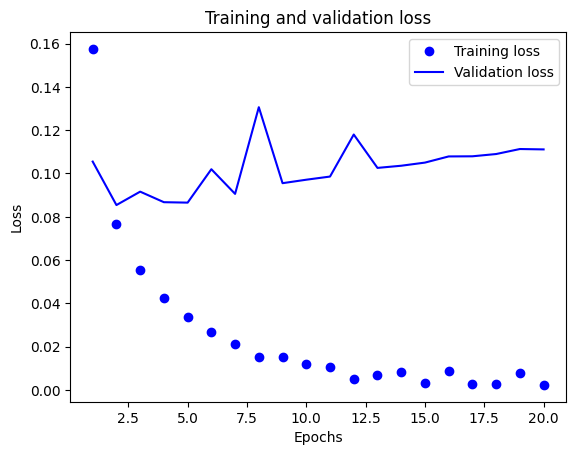

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")        
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Listing 4.9 Plotting the training and validation accuracy

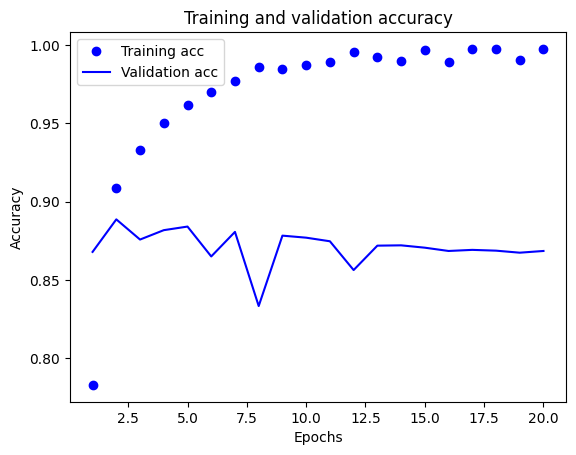

In [20]:
plt.clf()                           
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Listing 4.10 Retraining a model from scratch

In [21]:
model = keras.Sequential([
    layers.Dense(UNITS, activation="relu"),
    layers.Dense(UNITS, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss= LOSS_FUNCTION,
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.1422 - accuracy: 0.8130
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0729 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.0551 - accuracy: 0.9319
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0899 - accuracy: 0.8785


Final results for test loss & test accuracy

In [22]:
results

[0.08990626782178879, 0.8785200119018555]

In [23]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.12120138],
       [0.9995066 ],
       [0.9304105 ],
       ...,
       [0.10727615],
       [0.06331171],
       [0.56350416]], dtype=float32)